<a href="https://colab.research.google.com/github/prathisthahaha/GitHub-Task/blob/main/netflix_prats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Installing Necessary Libraries</h1>


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install yellowbrick

In [ ]:
!pip install -U kaleido

In [ ]:
!pip install kaleido


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00


In [ ]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netflix_data = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

<h2>Basic Visualization of Data</h2>

In [ ]:
netflix_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water                    
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans                    
4      s5  TV Show           Kota Factory                    

                                                cast        country  \
0                                                     United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...                  
3                                                                     
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
netflix_data.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [ ]:
netflix_data.shape

(8807, 12)

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Check for null values in data
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

In [ ]:
# Check for duplicated entries.
netflix_data.duplicated().sum()

0

In [ ]:
# Statistical info.
netflix_data.describe(include='all')

show_id   type                 title director  cast        country  \
count     8807   8807                  8807     8807  8807           8807   
unique    8807      2                  8807     4529  7693            749   
top         s1  Movie  Dick Johnson Is Dead                 United States   
freq         1   6131                     1     2634   825           2818   
mean       NaN    NaN                   NaN      NaN   NaN            NaN   
std        NaN    NaN                   NaN      NaN   NaN            NaN   
min        NaN    NaN                   NaN      NaN   NaN            NaN   
25%        NaN    NaN                   NaN      NaN   NaN            NaN   
50%        NaN    NaN                   NaN      NaN   NaN            NaN   
75%        NaN    NaN                   NaN      NaN   NaN            NaN   
max        NaN    NaN                   NaN      NaN   NaN            NaN   

             date_added  release_year rating  duration  \
count              8807   8807.000000   8807      8807   
unique             1768           NaN     18       221   
top     January 1, 2020           NaN  TV-MA  1 Season   
freq                109           NaN   3207      1793   
mean                NaN   2014.180198    NaN       NaN   
std                 NaN      8.819312    NaN       NaN   
min                 NaN   1925.000000    NaN       NaN   
25%                 NaN   2013.000000    NaN       NaN   
50%                 NaN   2017.000000    NaN       NaN   
75%                 NaN   2019.000000    NaN       NaN   
max                 NaN   2021.000000    NaN       NaN   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                              description  cluster_number  
count                                                8807     8807.000000  
unique                                               8775             NaN  
top     Paranormal activity at a lush, abandoned prope...             NaN  
freq                                                    4             NaN  
mean                                                  NaN        3.445328  
std                                                   NaN        2.729983  
min                                                   NaN        0.000000  
25%                                                   NaN        1.000000  
50%                                                   NaN        2.000000  
75%                                                   NaN        6.000000  
max                                                   NaN        9.000000

<h2>Inference -<br></h2><h3>There are 8807 rows and 12 main columns in the data <br>
No duplicates</h3>

<h1>Cleaning Data</h1>

In [ ]:
#checking no. of null values in each column
netflix_data.isnull().sum()
#netflix_data.cast.isnull().sum()

# Remove null values in date_added
# netflix_data.dropna(subset=['date_added'], inplace=True)

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
cluster_number    0
dtype: int64

<h3>Since there are no null values in the table therefore no need to remove them</h3>

<h3>Create some more datetime features like day,month and year added</h3>

In [ ]:
netflix_data['date_added'] = netflix_data['date_added'].str.strip()
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])  # First convert date_added to date time format.
netflix_data['day_added'] = netflix_data['date_added'].dt.day            # Compute day.
netflix_data['year_added'] = netflix_data['date_added'].dt.year          # Compute year.
netflix_data['month_added'] = netflix_data['date_added'].dt.month        # Compute month.


<h1>Data Analysis on Netflix Data</h1>

In [ ]:
#pie chart for Type of content watched

colors = [' #A020F0', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = netflix_data.type.value_counts()[1]
movie = netflix_data.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

# fig.show('png')

<h5>69.6% is Movies and 30.4% are TV shows</h5>

In [ ]:
# Plot growth of the contents over the years.
tv_show = netflix_data[netflix_data["type"] == "TV Show"]
movie = netflix_data[netflix_data["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "year_added", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "year_added", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0230"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#599d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.2, y=0.9, orientation="h"))
fig = go.Figure(data, layout=layout)

# fig.write_image("images/content_added_over_year.png", scale=5)
# fig.show('png')
fig.show()

In [ ]:
# Check why does it suddenly drop in 2021.
len(netflix_data[netflix_data['year_added'] == 2021])

1498

<h4>Growth in the number of movies on Netflix is much higher than tv shows after 2015.<br>
From 2015 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.<br>
The highest number of movies and tv shows got added in 2019 and 2020.<br>
The line plot shows very few movies, and tv shows got added in 2021. Maybe because of less shooting due to Corona disease</h4>

<h1></h1>

<h2>Finding in which month most movies/tv shows get added</h2>

In [ ]:
# Create dataframe to store month values and counts.
months_df = pd.DataFrame(netflix_data.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'month_count'}, inplace=True)
# months_df.head()

In [ ]:
#histogram to depict how many movies and tv shows are added in each month in netflix
fig = px.bar(months_df, x='month_count', y="count", text_auto=True, color='count', color_continuous_scale=['#FFC0CB', '#A020F0'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)
# fig.show()
# fig.show('png')

<h4>Most of the content is uploaded either by year ending or beginning or just in the middle of year<br>
April, July, December are months in which many shows and movies get uploaded to the platform.<br>
It might be due to the Christmas holiday season where families like to gather around and watch movies</h4>

<h1></h1>

<h2>Finding in which day of the month most movies/tv shows get added</h2>

In [ ]:
# Create dataframe to store day values and count.
days_df = pd.DataFrame(netflix_data.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'day_count'}, inplace=True)
days_df.head()

day_count  count
0        1.0   2212
1       15.0    687
2        2.0    325
3       16.0    289
4       31.0    274

In [ ]:
fig = px.bar(days_df, x="day_count", y="count", text_auto=True, color='count', color_continuous_scale=['#FFC0CB', '#A020F0'])
fig.update_layout(
    title={
        'text': 'Which days are more prominent',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=600)
fig.show()
# fig.show('png')

<h4>Most of the content is uploaded at the beginning, middle, or the end of a month.<br>
Dates - 1st, 15th or 31st of a month more prominent in getting new tv shows and movies.</h4>

<h1></h1>

<h2>Country-wise Content Production</h2>

In [ ]:
# Import dataset containing Contries and their codes.
country_code_df = pd.read_csv('/content/drive/MyDrive/Country_Data_Codes.csv', usecols=['Country', 'Code'])

In [ ]:
countries = (", ".join(netflix_data['country'].dropna())).split(", ")
countries_dict = dict(Counter(countries))
countries_dict = dict((key.lower(), value) for key, value in countries_dict.items())
country_code_df['Country'] = country_code_df['Country'].str.lower()
# print(countries_dict)

In [ ]:
country_code_df['Count'] = country_code_df['Country'].map(countries_dict)

In [ ]:
# Country codes df with country counts.
country_code_df.head()

Country Code  Count
0     afghanistan  AFG    1.0
1        akrotiri  XQZ    NaN
2         albania  ALB    1.0
3         algeria  DZA    3.0
4  american samoa  ASM    NaN

In [ ]:
# Create Geo plot to see which country produces how much content

# Define data
data = dict(type='choropleth',
            locations = country_code_df['Code'],
            z = country_code_df['Count'],
            text = country_code_df['Country'],
            marker = dict(line = dict (color = 'grey',width = 0.5)),
            colorscale=['#FFC0CB', '#A020F0'],
            colorbar = dict(title = 'Count')
            )

# Define layout.
layout = dict(title = 'Country-wise Content Production', title_x=0.5,height=700, width=1200,
              geo = dict( projection = {'type':'equirectangular'},
                         showlakes = False,
                         showcoastlines = False,
                         showframe = False,
                         showocean = False,
                         showland = False,
                         fitbounds = 'locations',
                         ))

# Plot it.
country_plot = go.Figure(data = [data],
              layout = layout
              )
# iplot(country_plot)
country_plot.show()

<h2>Top 10 countries with the most content</h2>

In [ ]:
#top ten countries that produce most of the content
top_ten = Counter(countries_dict).most_common(10)

country = [_[0] for _ in top_ten][::-1]
count = [_[1] for _ in top_ten][::-1]
trace1 = go.Bar(y=country, x=count, orientation="h", name="", marker=dict(color='#A020F0'))

data = [trace1]
layout = go.Layout(title="Countries with most content", title_x = 0.5, height=500, width=1200, legend=dict(x=0.5, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()
# fig.show('png')

<h4>USA produces the most amount of content among all countries<br> USA, India, and Uk create more than half of the tv shows and movies on the platform</h4>

<h1></h1>

<h2>Release years of movies and tv shows(bins)</h2>

In [ ]:
release_yr_bin = pd.cut(netflix_data.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'count':'release_count'}, inplace=True)
release_yr_bin['release_year'] = release_yr_bin['release_year'].astype('string')
release_yr_bin

release_year  release_count
0  (2010, 2021]           7278
1  (1999, 2010]           1004
2  (1924, 1999]            525

In [ ]:
# Plot it.
fig = px.pie(release_yr_bin, values='release_count', names='release_year', color_discrete_sequence=['#FFC0CB', '#A020F0', '#076090'], title='When was most content released.',height=500, width=500)
fig.show()
# fig.show('png')

<h4>82% of the content available was released between 2010 and 2021.<br>
17% of the content available was released before 2010.</h4>

<h1></h1>

<h2>WordCloud for Titles</h2>

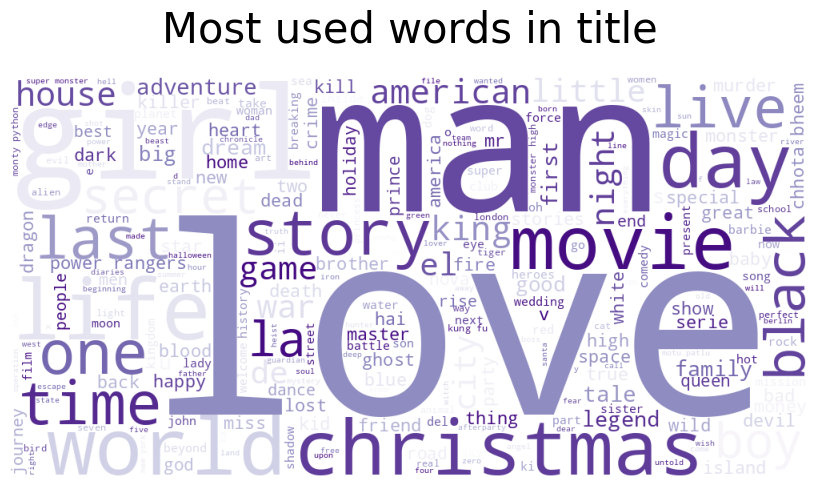

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in netflix_data.title:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'Purples').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

<h4>Most repeated words in title include Love, girl, World, Man, christmas.</h4>

<h1></h1>

<h2>WordCloud for Description</h2>

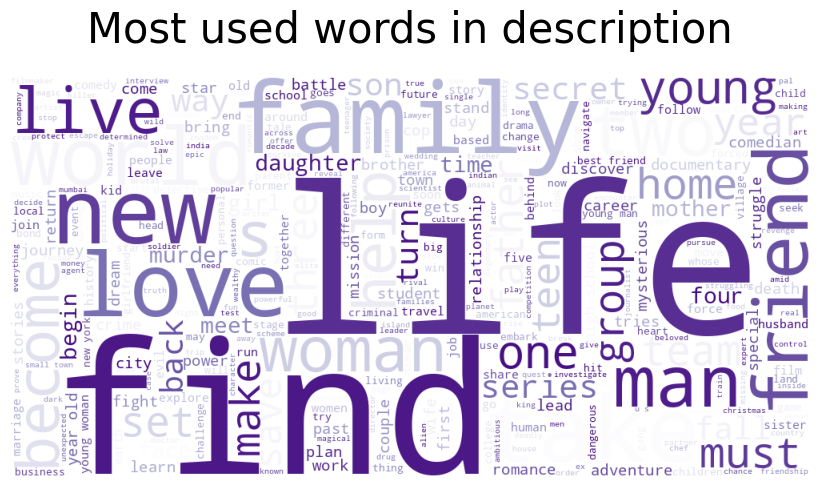

In [ ]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in netflix_data.description:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'Purples').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

<h4>Most used words used in description are life, find, new, love, live, man, friend</h4>

<h2>Directors with most no. of TV shows/Movies released</h2>

In [ ]:
# Replace the null values in director.
netflix_data['director']=netflix_data['director'].fillna('')

In [ ]:
directors_list = netflix_data.director.value_counts().reset_index().head(25)[1:]
directors_list.rename(columns={'index':'Directors_name', 'count':'Director_count'}, inplace=True)
# directors_list
fig = px.bar(directors_list, x='director', y='Director_count', text_auto=True,
             color='Director_count', color_continuous_scale=['#FFC0CB', '#A020F0'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()
# fig.show('png')


<h4>Rajiv Chilaka, Raul Campos, Jan Sutler, Suhas Kadav and Marcus Raboy are the top 5 directors which highest number of movies and tv shows.</h4>

<h2>Actors / Actresses with most content on Netflix</h2>

In [ ]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data)
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [ ]:
# Create dataframe for list of actors.
cast_df = netflix_data['cast']
actor_list = pd.DataFrame([data2list(cast_df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(0)  # dropped the nan values in the dataframe which was present at 0th index.
actor_list.head(10)

index   0
1450         Anupam Kher  39
305         Rupa Bhimani  31
5056    Takahiro Sakurai  30
304        Julie Tejwani  28
12108            Om Puri  27
2212      Shah Rukh Khan  26
307          Rajesh Kava  26
3728       Andrea Libman  25
7644        Paresh Rawal  25
7639         Boman Irani  25

In [ ]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#FFC0CB', '#A020F0'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()

<ipython-input-17-de1a965c5ffb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h4>Anupam Kher, Rupa Bhimani, Om Puri, Shah Rukh Khan, Rajesh Kava, Paresh Rawal, Boman Irani are the actors from India, and are in the list of Actors with most content on platform </h4>

<h1></h1>

<h2>Content provided by different countries</h2>

In [ ]:
country_null_values = netflix_data.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')

We had observed that variable country had 831 null values in it, we will replace these null values with the most occurring country which is United States.


In [ ]:
netflix_data['country'].fillna('United States', inplace=True)
netflix_data['country_single'] = netflix_data['country'].apply(lambda x: x.split(",")[0])
country_order = netflix_data['country_single'].value_counts()[:10].index
countryVScontent = netflix_data[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type  country_single   Movie  TV Show
0      United States  2804.0   1238.0
1              India   927.0     81.0
2     United Kingdom   382.0    246.0
3             Canada   187.0     84.0
4              Japan    85.0    174.0
5             France   148.0     64.0
6        South Korea    47.0    164.0
7              Spain   129.0     52.0
8             Mexico    86.0     48.0
9          Australia    61.0     56.0

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=countryVScontent['country_single'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(
        color='#FFC0CB'
    )
))
fig.add_trace(go.Bar(
    y=countryVScontent['country_single'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='#A020F0'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
fig.show()

<h4>The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.<br>

The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.<br>

On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.</h4>

<h1></h1>

<h2>Genres popular in each country</h2>

In [ ]:
# Create subset of dataset with required data.
countryVSgenre = netflix_data[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = countryVSgenre[countryVSgenre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']

# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

country_genre_count_df

Genre  United States  India  United Kingdom  \
0                  Documentaries            486   19.0            84.0   
1                 Crime TV Shows            160    8.0            38.0   
2         International TV Shows            250   65.0           112.0   
3          TV Action & Adventure             85    5.0             3.0   
4                     Docuseries            238    8.0            78.0   
5                     Reality TV            164    5.0            33.0   
6                      TV Dramas            289   27.0            23.0   
7                      TV Horror             32    7.0             1.0   
8                   TV Mysteries             45    2.0             NaN   
9       Children & Family Movies            378   18.0             8.0   
10                      Comedies            618  308.0            32.0   
11                        Dramas            701  620.0            45.0   
12              British TV Shows             21    2.0           196.0   
13                   TV Comedies            314   26.0            36.0   
14          International Movies            230  817.0            66.0   
15                     Thrillers            221   88.0            16.0   
16     Spanish-Language TV Shows             41    NaN             NaN   
17              Music & Musicals            166   88.0            14.0   
18                 Horror Movies            160   32.0             9.0   
19              Sci-Fi & Fantasy            108   10.0             6.0   
20            Independent Movies            313  150.0            25.0   
21                  TV Thrillers             25    3.0             1.0   
22                      Kids' TV            227   10.0            22.0   
23            Action & Adventure            291  127.0            19.0   
24           TV Sci-Fi & Fantasy             52    3.0             1.0   
25                Classic Movies             62   11.0             3.0   
26             Romantic TV Shows            108   11.0            10.0   
27                 Sports Movies            109   15.0            15.0   
28                  Anime Series             28    NaN             NaN   
29               Korean TV Shows             16    NaN             NaN   
30               Romantic Movies            201  118.0             5.0   
31           Science & Nature TV             51    NaN            20.0   
32                   Cult Movies             40    5.0             3.0   
33                      TV Shows             11    3.0             NaN   
34          Faith & Spirituality             32    3.0             NaN   
35                  LGBTQ Movies             60    2.0             4.0   
36                 Teen TV Shows             36    1.0             NaN   
37                Anime Features              9    NaN             NaN   
38                        Movies             43    NaN             2.0   
39               Stand-Up Comedy            247    6.0            20.0   
40  Stand-Up Comedy & Talk Shows             42    3.0             1.0   
41             Classic & Cult TV             14    NaN             6.0   

    Canada  Japan  France  South Korea  Spain  Mexico  Australia  
0     21.0    NaN    24.0          1.0   17.0    10.0        6.0  
1      9.0   15.0    14.0         24.0   20.0    22.0        6.0  
2     19.0  141.0    32.0        149.0   46.0    35.0       27.0  
3      2.0    4.0     3.0          7.0    3.0     2.0        NaN  
4      8.0    1.0     5.0          NaN    5.0     2.0        9.0  
5      9.0    6.0     2.0          3.0    3.0     NaN       11.0  
6     18.0   20.0    20.0         36.0    9.0     6.0       15.0  
7      3.0    4.0     3.0          3.0    NaN     NaN        1.0  
8      3.0    4.0     2.0          3.0    NaN     NaN        1.0  
9     31.0   10.0     1.0          1.0    1.0     2.0        9.0  
10    39.0    NaN    18.0          6.0   34.0    17.0        5.0  
11    22.0   12.0    31.0         21.0  

In [ ]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)  #1,1 is the row and column no. for the given pie chart
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
fig.show()

<h4>Drama, International Movies, and Comedies seem popular choices in most countries.<br>
British and International Tv Shows dominate in the United Kingdom.<br>
Regional specialties such as Anime in Japan and Korean Tv shows in South Korea are more prominent in these countries; This makes sense as anime has always been popular in Japan, and the rising k-pop culture explains the increase in Korean Tv Shows.<br>
It's also observed that in the countries where the regional language is not English, International Tv Shows and Movies are more in demand.</h4>

<h2>Trend of genres added over the years</h2>

<h4>Hypothesis Testing to check is there is any relation between year_added and type:<br>

Null Hypothesis: year_added has no impact on type of content that gets added to the platform.<br>
Alternative Hypothesis: year_added has impact on type of content that gets added to the platform.<br><br>
Set significance level to 0.05.

In [ ]:
hypo_data = pd.crosstab(netflix_data['type'], netflix_data['year_added'], margins=True)
hypo_data

year_added  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  \
type                                                                         
Movie            1       2       1      13       3       6      19      56   
TV Show          1       0       0       0       0       5       5      26   
All              2       2       1      13       3      11      24      82   

year_added  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0   All  
type                                                              
Movie          253     839    1237    1424    1284     993  6131  
TV Show        176     349     412     592     595     505  2666  
All            429    1188    1649    2016    1879    1498  8797

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

2.244165256124046e-09

<h4>The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis - year_added has impact on type of content that gets added to the platform</h4>

In [ ]:
# Now lets check what type of content got added in the past few years.

'''We will only check for the type of genres that got added in the years 2018-2021 for better visualization. '''

# Create subset of data with required columns.
recent_years = pd.DataFrame(netflix_data.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)   #.index - This retrieves the index labels of the selected rows.

''' There are many rows with multiple genre entries therefore we will
 create a function to split each of them and get their respective counts.'''

def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
yr_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
yr_genre_count_list = {}
for i in yr_list:
  data = seperate_all_genre(i)
  yr_genre_count_list[i] = data
  yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
  yr_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

yr_genre_count_df

Genre  2018  2019  2020  2021
0             Action & Adventure    35    40    32    41
1                 Anime Features     6     7     7     7
2                 Classic Movies     4    22    15    12
3           International Movies    53    52    47    45
4               Sci-Fi & Fantasy    24    26    21    17
5       Children & Family Movies    18    26    28    21
6                         Dramas    47    57    60    52
7                       Comedies    38    50    48    44
8                    Cult Movies     9    14    11    13
9                  Horror Movies    19    22    20    18
10            Independent Movies    30    30    28    17
11                 Documentaries    14    11    12    13
12          Faith & Spirituality     9     7     6     5
13              Music & Musicals    16    18    20    17
14               Romantic Movies    14    23    23    19
15                 Sports Movies    11    14    15    13
16                  Anime Series     5    12    11    13
17        International TV Shows    55    57    59    49
18             Romantic TV Shows    10    18    16    15
19                     TV Horror     7    11    10    11
20                  TV Thrillers     4     9     9     9
21                      Kids' TV    13    18    17    14
22              British TV Shows    18    16    13    11
23             Classic & Cult TV     4     1     6     2
24                   TV Comedies    28    28    26    23
25                Crime TV Shows    24    21    19    24
26                    Docuseries    19    17    17    16
27                     TV Dramas    30    34    42    38
28           Science & Nature TV     6     7     6     4
29                    Reality TV    13    13    18    14
30  Stand-Up Comedy & Talk Shows     6     4     4     5
31         TV Action & Adventure    16    19    25    21
32                  LGBTQ Movies     7     9    10     9
33                     Thrillers    17    19    21    18
34                  TV Mysteries     8     8    13    10
35               Korean TV Shows     7     7     8     6
36     Spanish-Language TV Shows    13    11     8    12
37           TV Sci-Fi & Fantasy     8     9    14    12
38                 Teen TV Shows     4     9    12    12
39                        Movies     1     1     1     1
40               Stand-Up Comedy     2     2     1     1
41                      TV Shows     1     1     1     1

In [ ]:
# Plot the above data.
df = yr_genre_count_df.sort_values([2018,2019,2020,2021],ascending=False)  #[2018,2019,2020,2021]-This specifies the columns to sort by. It indicates that the DataFrame should be sorted based on the values in the columns with these year labels.
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[2018], x=df['Genre'],mode='lines+markers',name=2018))
fig.add_trace(go.Scatter(y=df[2019], x=df['Genre'],mode='lines+markers',name=2019))
fig.add_trace(go.Scatter(y=df[2020], x=df['Genre'],mode='lines+markers', name=2020))
fig.add_trace(go.Scatter(y=df[2021], x=df['Genre'],mode='lines+markers', name=2021))
fig.update_xaxes(tickangle=-90)  #genres will bedisplayed vertically
fig.update_layout(title={'text': 'Most added Genres in recent years.','y':0.97,'x':0.5,'font_size':25,'xanchor': 'center','yanchor': 'top'},height=650, width=1550,legend=dict(x=0.38, y=1.1, orientation="h"))

fig.show()

<h4>From the EDA we did in the beginning, we saw that there are more Movies than Tv Shows on Netflix, which might be enough to assume that Netflix focuses more on Movies than Tv Shows. But the data proves this assumption wrong.<br>

The above line plot shows that Netflix has been adding many International Tv Shows, Tv Dramas, Tv Comedy Shows and many more tv shows in the recent years compared to Movies.<br>

From this observation, we can say that Netflix might be shifting slowly towards Tv Shows.</h4>

<h1></h1>

<h2>Duration of movies and TV shows</h2>

In [ ]:
# Create subsets for tv shows and movies.
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
movies = netflix_data[netflix_data['type'] == 'Movie']

movies.dropna(inplace=True)

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '').str.replace(' Seasons', '').str.replace('s', '')   #replacing Season,Seasons,s substrings with empty space
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)   #astype(str) converts it into string

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

<ipython-input-57-99fd055311d4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



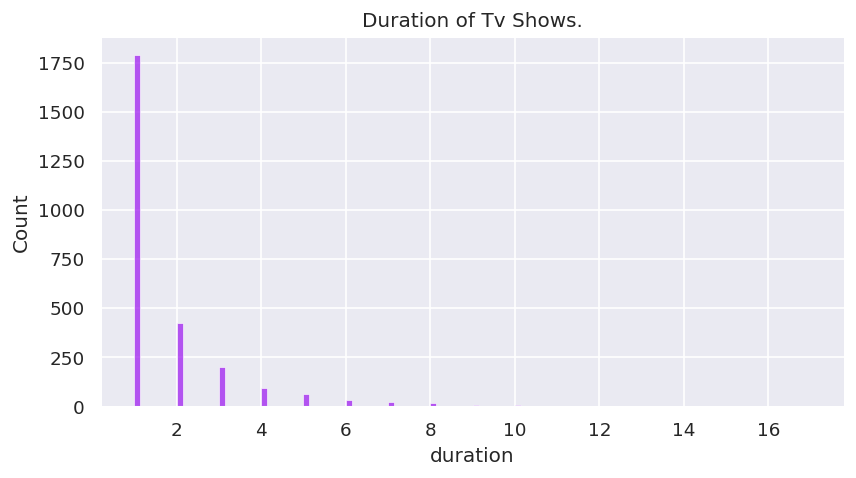

In [ ]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#A020F0')
plt.title('Duration of Tv Shows.')
plt.show()

<h4>Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.</h4>

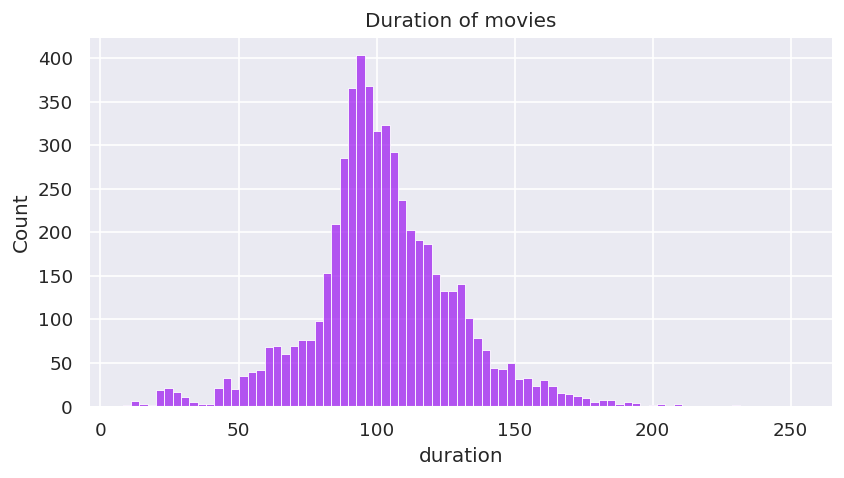

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#A020F0')
plt.title('Duration of movies')
plt.show()

<h4>Most of the movies last for 90 to 120 minutes.</h4>

<h1></h1>

<h2>Ratings</h2>

<h4>Abbreviations used for ratings on shows and movies for different age group of people -</h4>

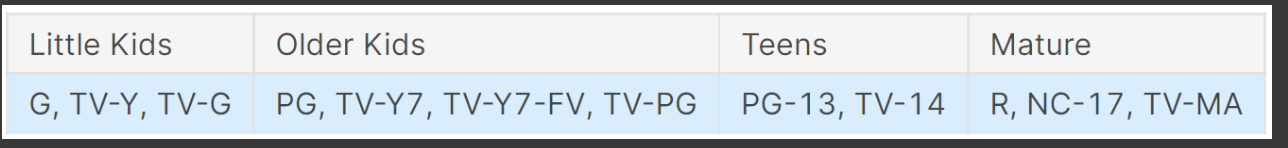

In [ ]:
movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_shows['rating'].value_counts())

In [ ]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),    #x-values for the bar chart is the list of TV show names extracted from the keys of the tv_shows_rating dictionary
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='#A020F0'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='#FFC0CB'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2
)
fig.show()

<h4>TV-MA tops the charts, indicating that mature content is more popular on Netflix.<br>
This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.<br>
Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

<h1></h1>


<h1>DATA PRE-PROCESSING</h1>

<h3>Creating clusters of data</h3>

In [ ]:
netflix_data = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
netflix_data.fillna('', inplace=True)
cluster_df = netflix_data[['title']].copy()
cluster_df['cluster_data'] = (netflix_data['description'] + ' ' + netflix_data['listed_in'] + ' ' + netflix_data['director'] + ' ' + netflix_data['cast'] + ' ' + netflix_data['country'] + ' ' + netflix_data['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()


# print(netflix_data['description'].isnull().sum())
# print(netflix_data['listed_in'].isnull().sum())
# print(netflix_data['director'].isnull().sum())
# print(netflix_data['cast'].isnull().sum())
# print(netflix_data['country'].isnull().sum())
# print(netflix_data['rating'].isnull().sum())


cluster_data
title                                                                   
Dick Johnson Is Dead   As her father nears the end of his life, filmm...
Blood & Water          After crossing paths at a party, a Cape Town t...
Ganglands              To protect his family from a powerful drug lor...
Jailbirds New Orleans  Feuds, flirtations and toilet talk go down amo...
Kota Factory           In a city of coaching centers known to train I...

<h3>Data Cleaning</h3>

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

cluster_data
title                                                                  
Dick Johnson Is Dead  As her father nears the end of his life filmma...
Blood & Water         After crossing paths at a party a Cape Town te...

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
Dick Johnson Is Dead    father nears end life filmmaker kirsten johnso...
Blood & Water           crossing paths party cape town teen sets prove...
Name: cluster_data, dtype: object

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

cluster_data
title                                                                  
Dick Johnson Is Dead  father near end life filmmak kirsten johnson s...
Blood & Water         cross path parti cape town teen set prove whet...

In [ ]:
bag_of_words = cluster_df.cluster_data
bag_of_words.head(10)

title
Dick Johnson Is Dead                father near end life filmmak kirsten johnson s...
Blood & Water                       cross path parti cape town teen set prove whet...
Ganglands                           protect famili power drug lord skill thief meh...
Jailbirds New Orleans               feud flirtat toilet talk go among incarcer wom...
Kota Factory                        citi coach center known train india finest col...
Midnight Mass                       arriv charismat young priest bring glorious mi...
My Little Pony: A New Generation    equestria divid brightey hero believ earth pon...
Sankofa                             photo shoot ghana american model slip back tim...
The Great British Baking Show       talent batch amateur baker face 10week competi...
The Starling                        woman adjust life loss contend feisti bird tha...
Name: cluster_data, dtype: object

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=2000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(8807, 2000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['1970s', '1980s', 'aamir', ..., 'zealand', 'zhang', 'zoe'],
      dtype=object)

<h3>Dimensionality Reduction</h3>

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X.toarray())

PCA()

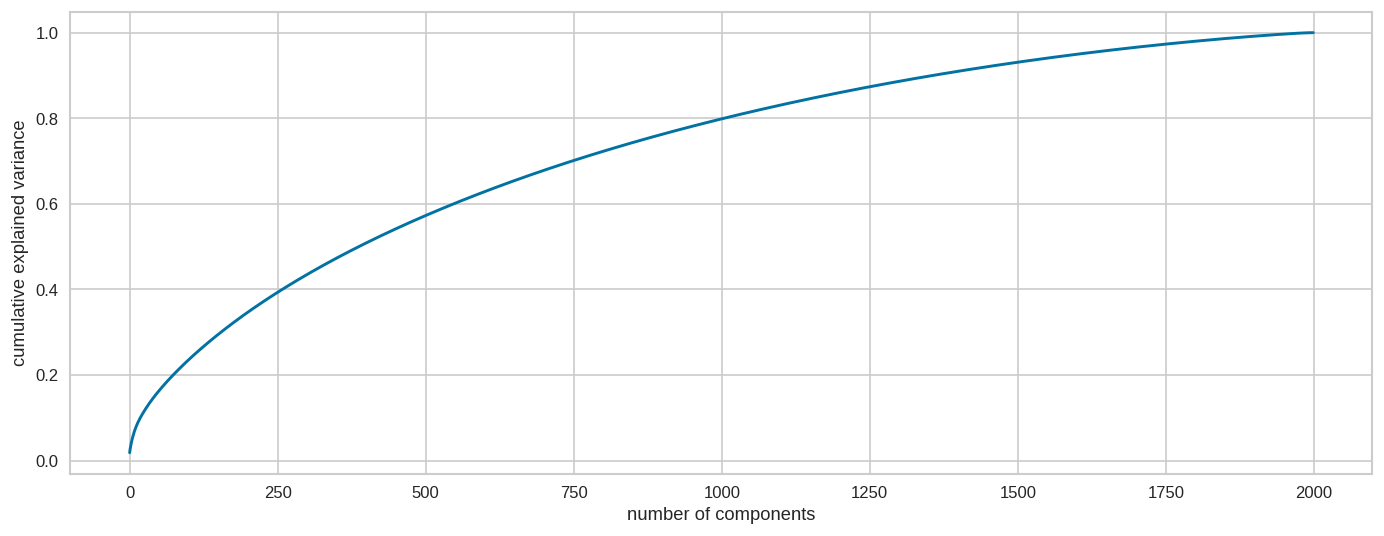

In [ ]:
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<h4>We can see from the above plot almost 95% of the variance can be explained by 480-500 components.<br>
Since choosing 500 could be tricky we will set the value to be 95% in sklearn.</h4>

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(8807, 1604)

In [ ]:
X_transformed

array([[ 6.15413120e-01,  2.51488335e-04, -3.85854222e-05, ...,
        -3.65696562e-07,  1.04564851e-06,  1.48888989e-06],
       [ 6.15413120e-01,  2.51488335e-04, -3.85854222e-05, ...,
        -3.65696562e-07,  1.04564851e-06,  1.48888989e-06],
       [ 6.15413120e-01,  2.51488335e-04, -3.85854222e-05, ...,
        -3.65696562e-07,  1.04564851e-06,  1.48888989e-06],
       ...,
       [-3.97485428e-01, -8.08216049e-02, -1.83560841e-02, ...,
         3.02252755e-03, -1.21067877e-02,  1.75250563e-02],
       [-4.03929663e-01, -1.29582537e-01, -4.22362517e-02, ...,
         2.85242524e-02, -2.16434796e-03,  8.15742096e-03],
       [-4.04711840e-01,  1.49402451e-01,  3.47448453e-01, ...,
         5.98886029e-03, -1.32160633e-02, -1.40483246e-03]])

<h3>Get optimum K value using Elbow method & Metric: Silhouette.</h3>

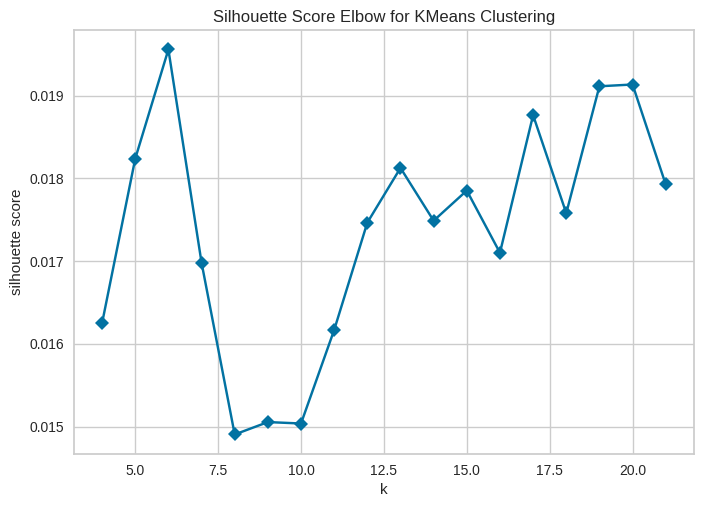

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5, n_init=10)

visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, silhouette score is 0.012967479054732275


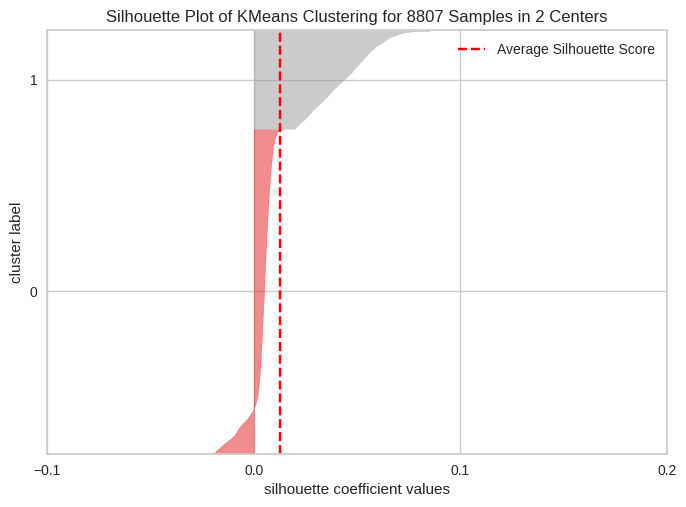

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3, silhouette score is 0.01433058634532285


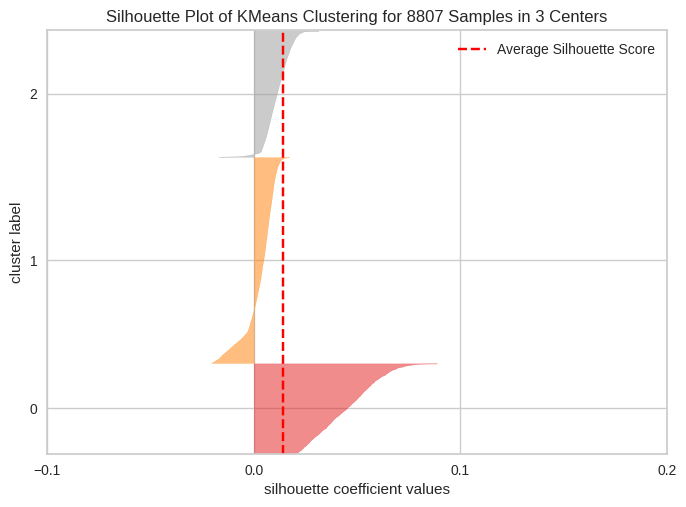

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4, silhouette score is 0.016249901977838262


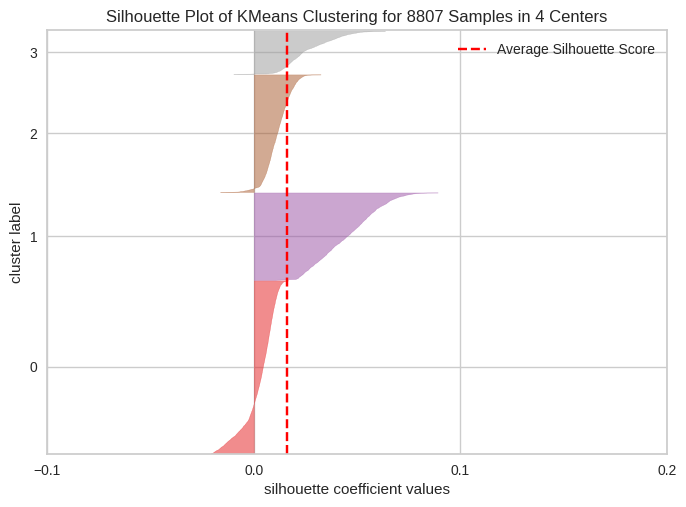

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5, silhouette score is 0.0182374807244287


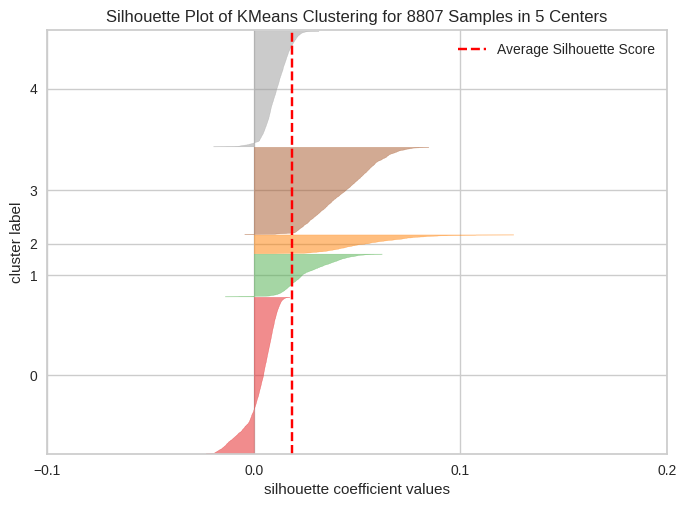

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6, silhouette score is 0.019557266996354104


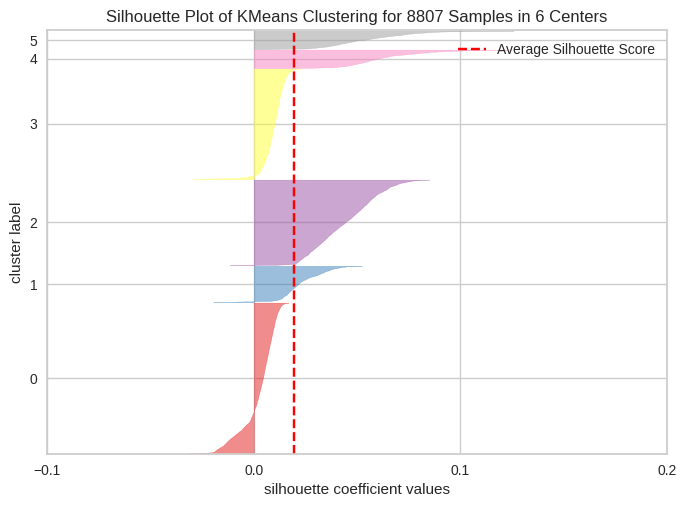

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7, silhouette score is 0.01698051592621794


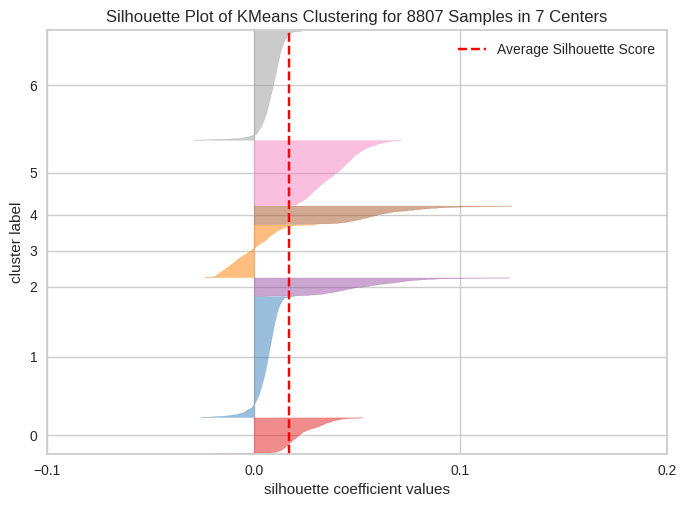

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8, silhouette score is 0.014904227848405414


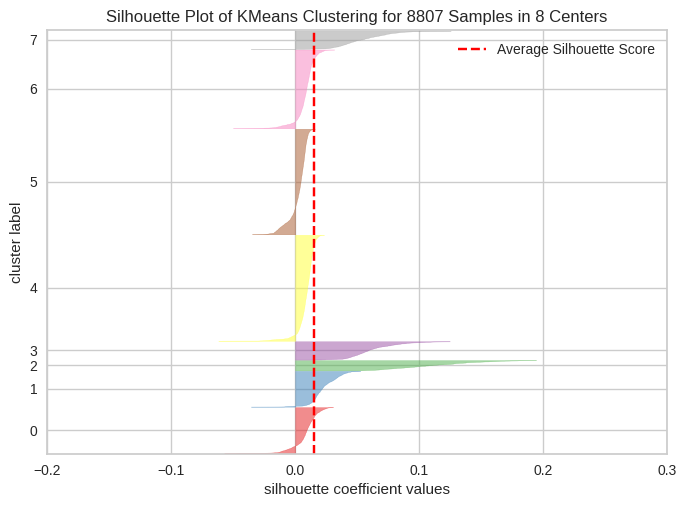

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9, silhouette score is 0.01505406099617825


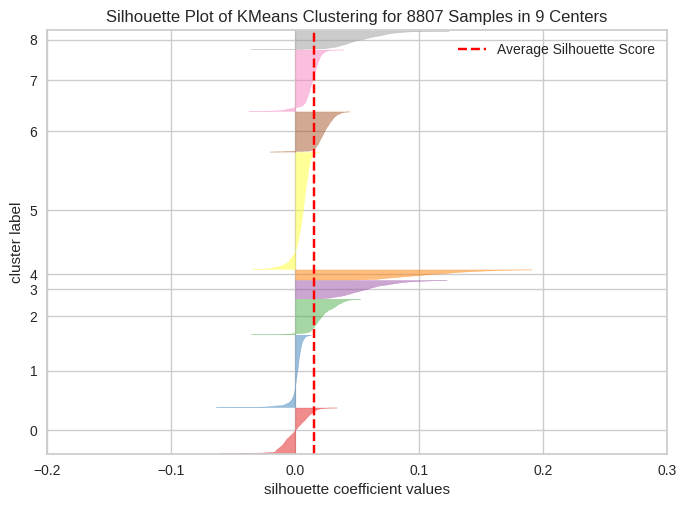

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 10, silhouette score is 0.015036682929126601


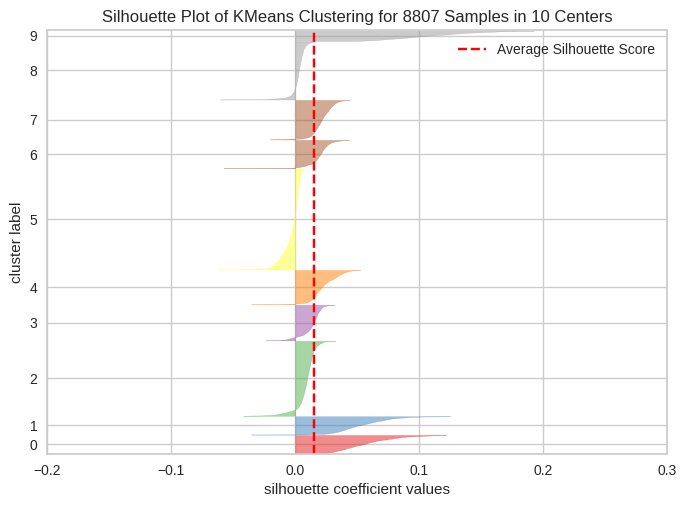

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 11, silhouette score is 0.016167427040170903


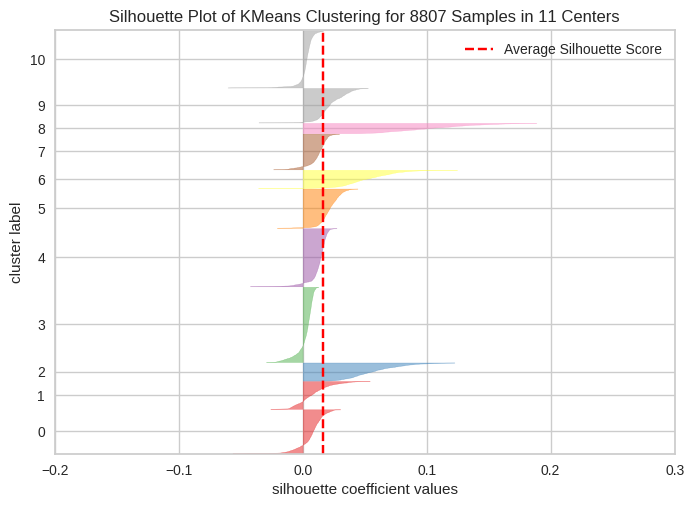

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 12, silhouette score is 0.017464534794180905


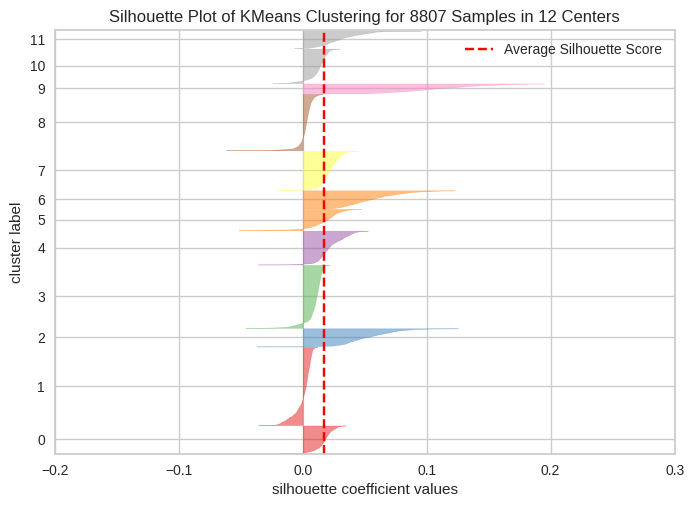

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 13, silhouette score is 0.01812583942066219


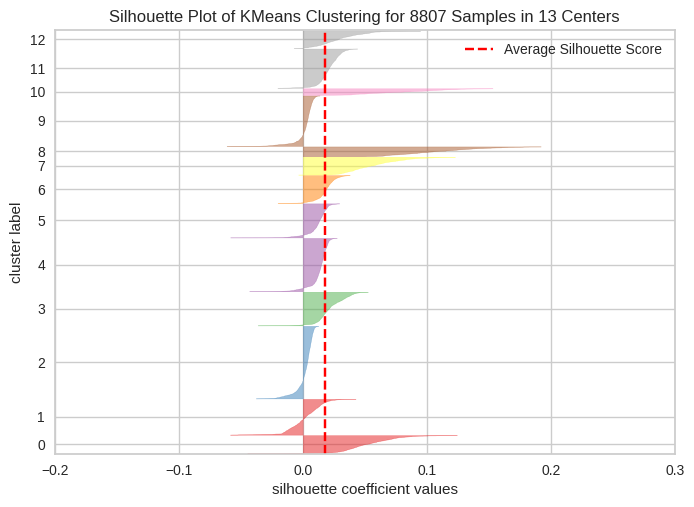

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 14, silhouette score is 0.017487801969742874


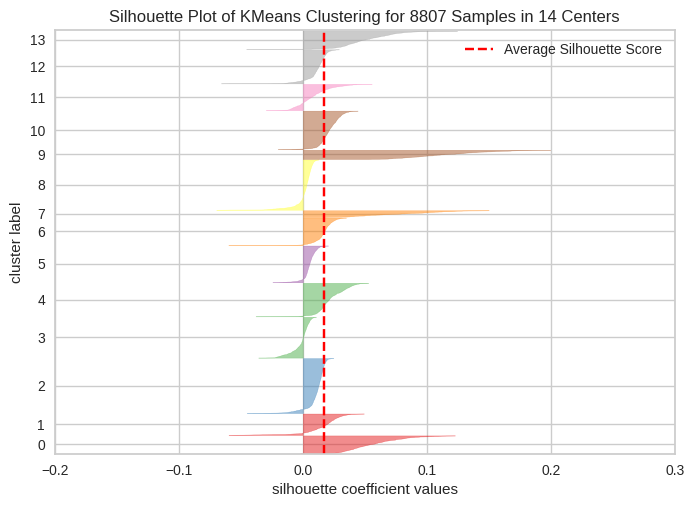

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 15, silhouette score is 0.017852186539616875


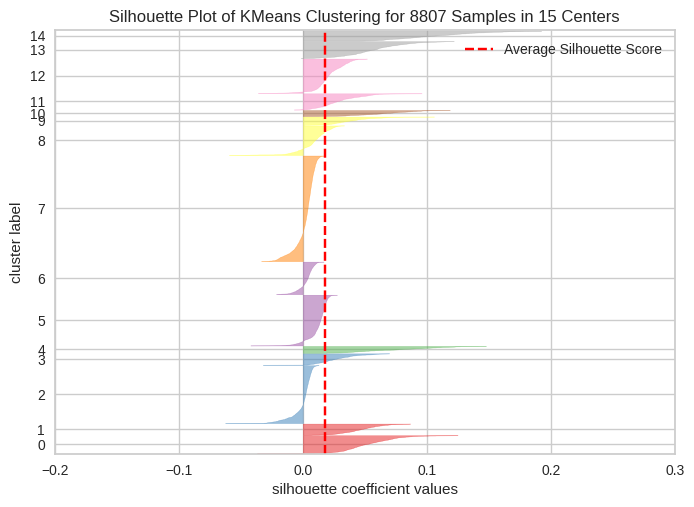

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 16, silhouette score is 0.017100316246292328


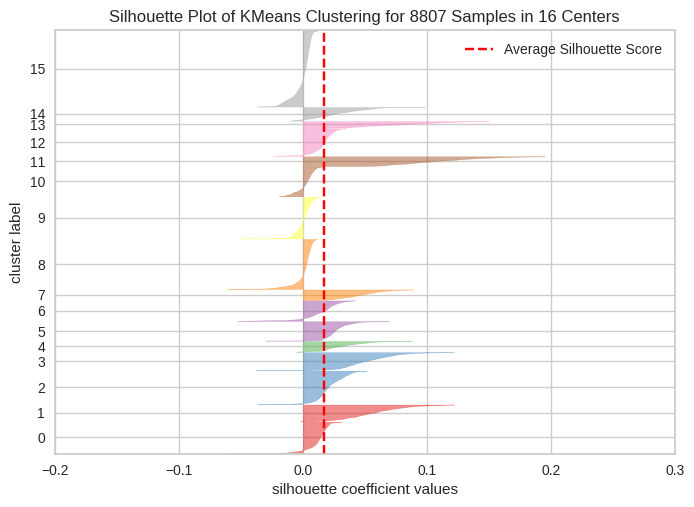

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 17, silhouette score is 0.018763187631789646


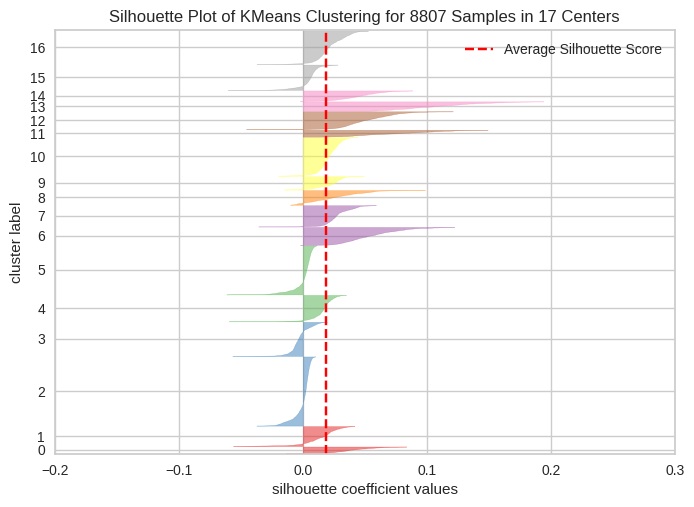

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 18, silhouette score is 0.017578648887787818


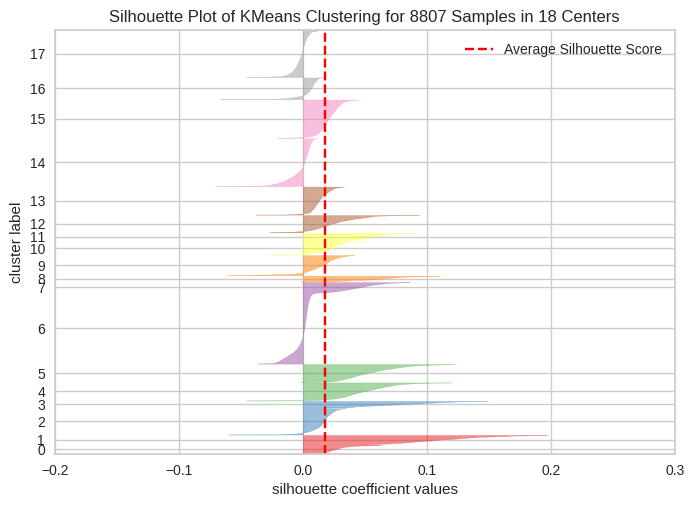

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 19, silhouette score is 0.019112375513910543


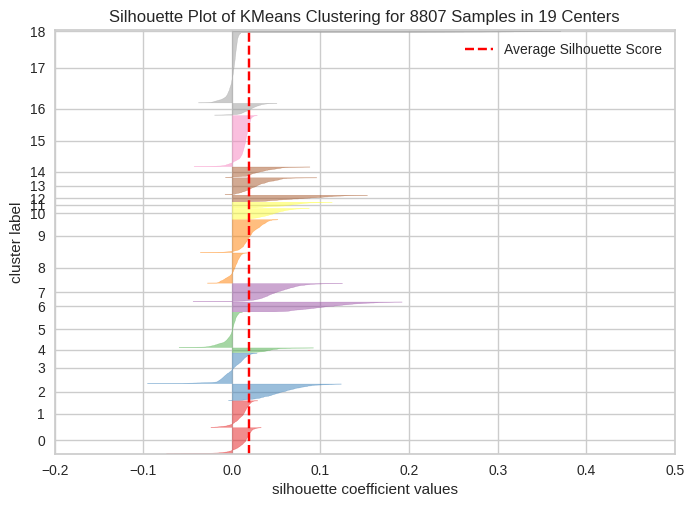

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 20, silhouette score is 0.01913391668307747


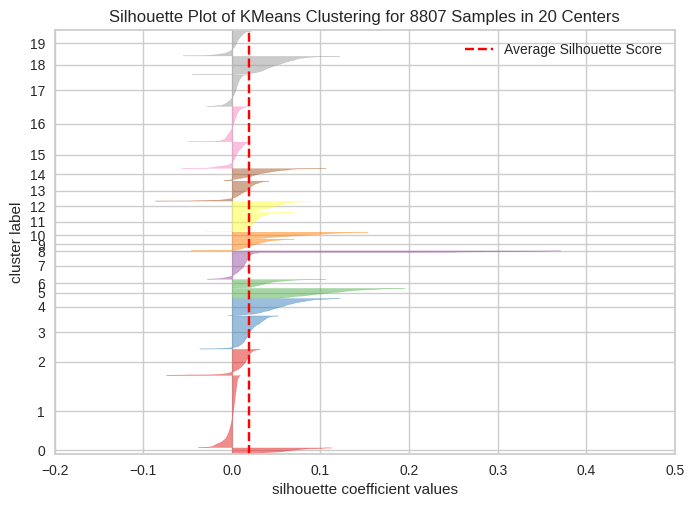

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 21, silhouette score is 0.01792602188761329


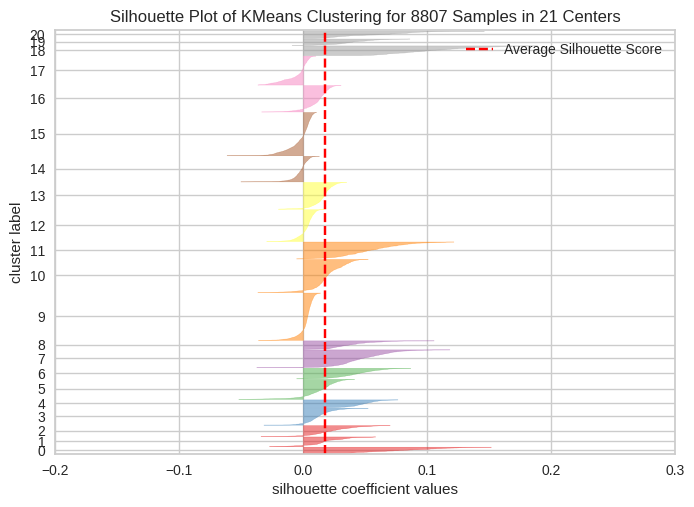

In [ ]:
silhouette_score_analysis(22)

<h3>Elbow method to find optimum 'k' value</h3>

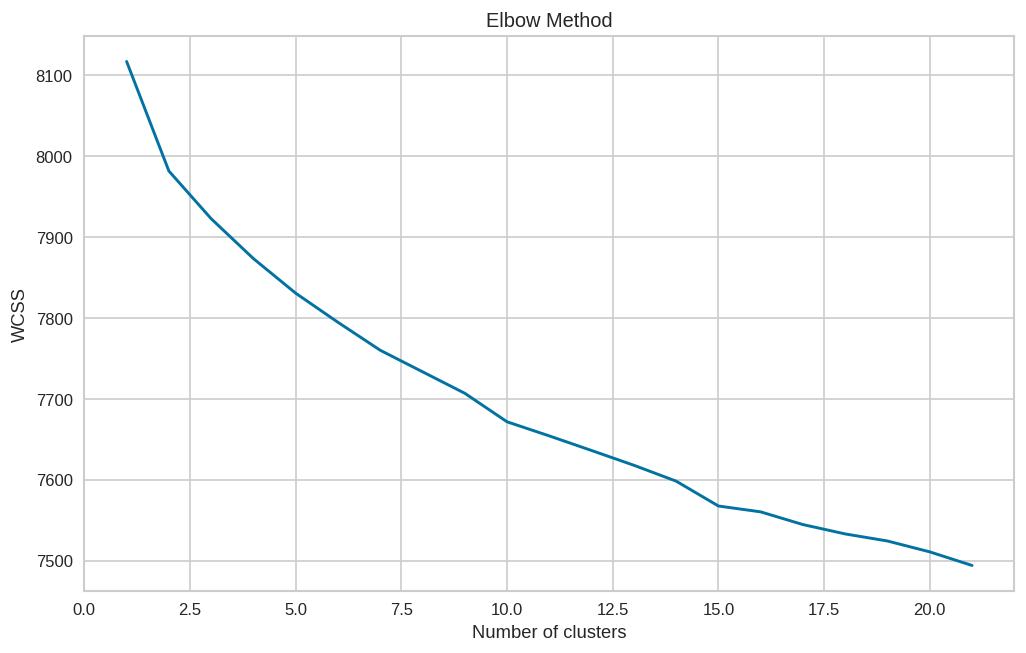

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h3>Clusering considering k=10</h3>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



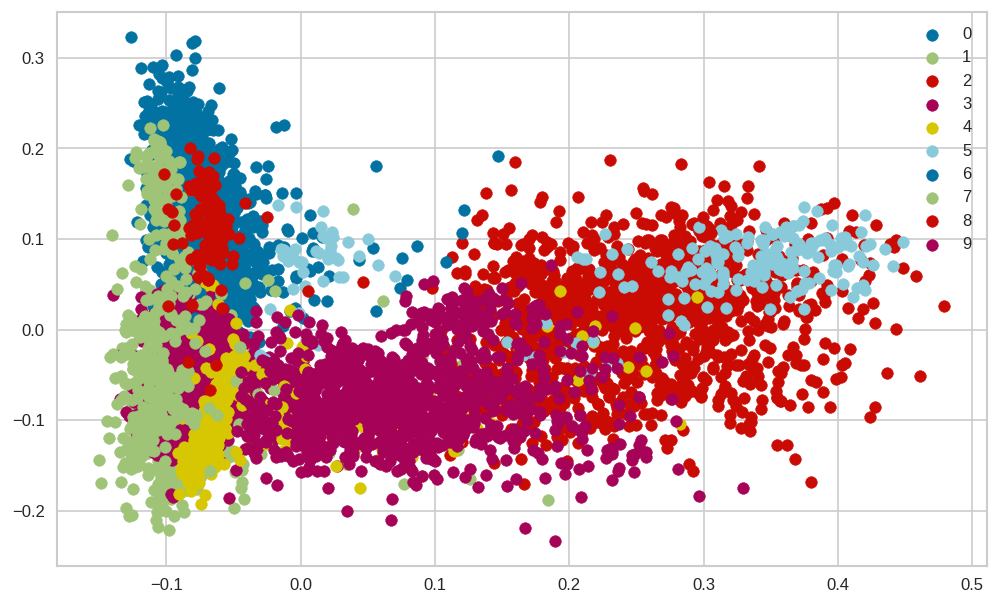

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
netflix_data['cluster_number'] = kmeans.labels_

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = netflix_data[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

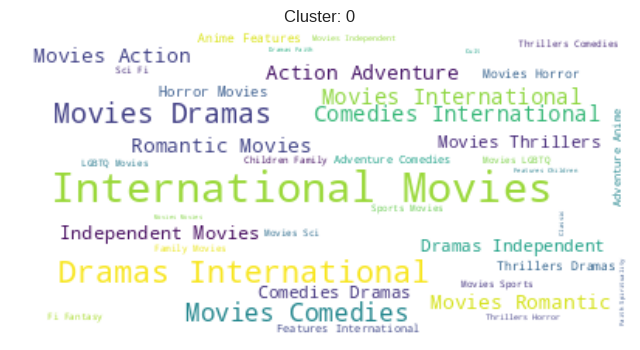

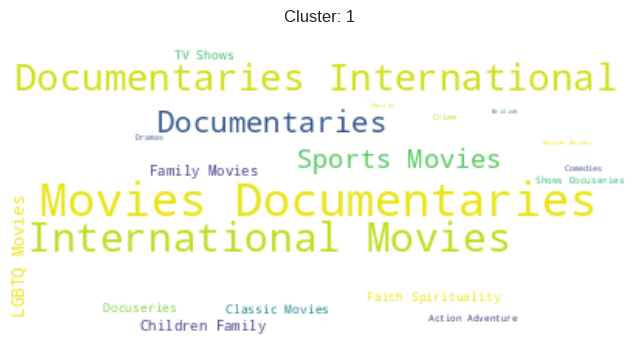

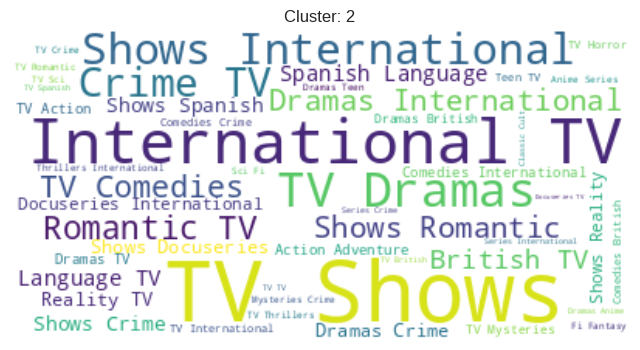

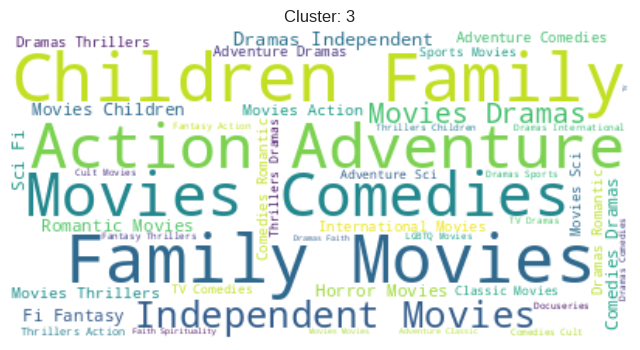

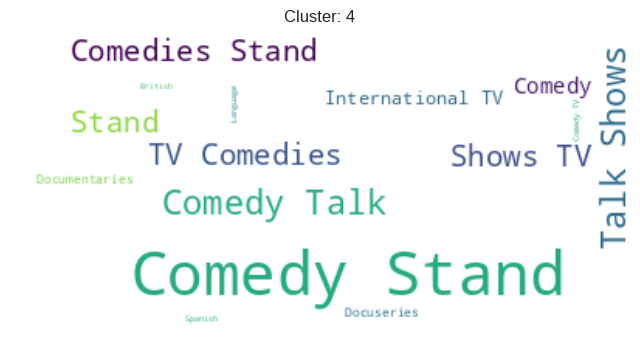

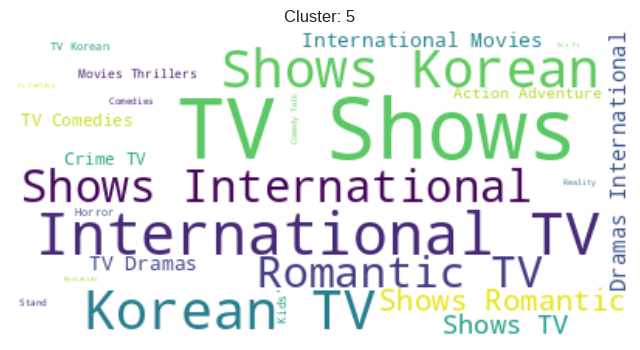

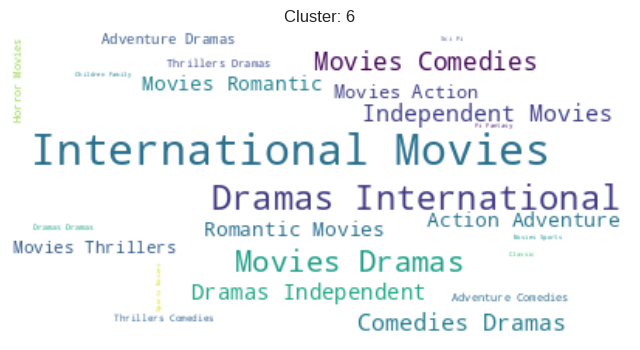

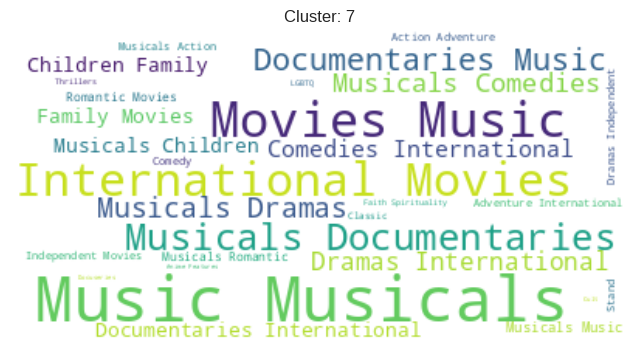

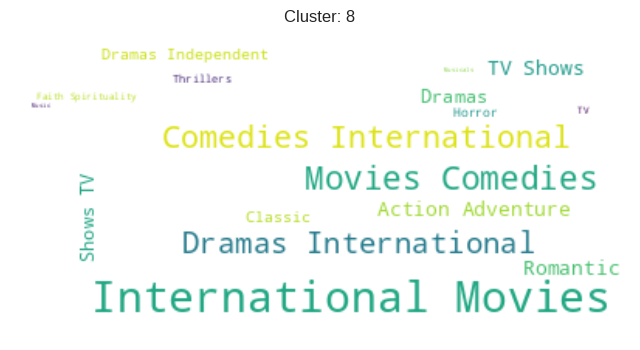

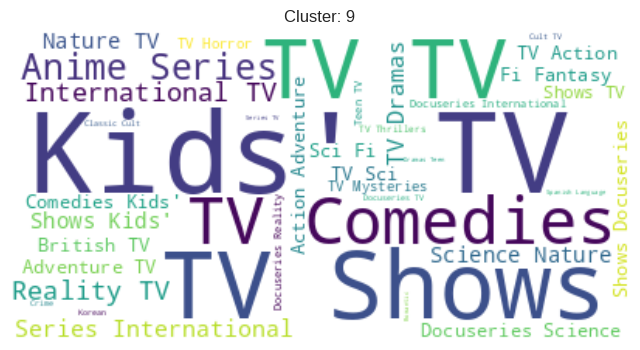

In [ ]:
for i in range(10):
  func_select_Category(i,'listed_in')

<h2>Get Recommendations</h2>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.00630116, 0.01663094,
        0.03785616],
       [0.        , 1.        , 0.02286939, ..., 0.01154787, 0.        ,
        0.00285371],
       [0.        , 0.02286939, 1.        , ..., 0.0116111 , 0.00462259,
        0.00606087],
       ...,
       [0.00630116, 0.01154787, 0.0116111 , ..., 1.        , 0.05138869,
        0.00180059],
       [0.01663094, 0.        , 0.00462259, ..., 0.05138869, 1.        ,
        0.00684998],
       [0.03785616, 0.00285371, 0.00606087, ..., 0.00180059, 0.00684998,
        1.        ]])

In [ ]:
indices = pd.Series(cluster_df.index)
indices[:5]

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):

    recommended_movies = []

    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])

    return recommended_movies

In [ ]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

Recommendations
0                      Bad Boys II
1                        GoldenEye
2                    Tortilla Soup
3                   Sniper: Legacy
4             Fun with Dick & Jane
5  Martin Lawrence Live: Runteldat
6                     Midnight Run
7                  War on Everyone
8                I Got the Hook Up
9                        Slow West

In [ ]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

Recommendations
0  13 Reasons Why: Beyond the Reasons
1                       The Staircase
2                  Unsolved Mysteries
3                            The Mist
4                           Mind Game
5                   Twice Upon A Time
6                     We Are the Wave
7                    Super Dark Times
8                             Re:Mind
9                                 Cam

In [ ]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('Kota Factory'), columns=['Recommendations'])
tvshows_recommendations.head(11)

Recommendations
0          Girls Hostel
1       Yeh Meri Family
2         Chaman Bahaar
3     Engineering Girls
4                Betaal
5        Dancing Angels
6  The Creative Indians
7         Find Yourself
8                Duniya
9                Sangam

<h3>k=10 was found to be an optimal value for clusters using which we grouped our data into 10 distinct clusters.<br>
Using the given data a simple recommender system was created using cosine_similarity and recommendations for Movies and Tv Shows were obtained.</h3>